In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
affair = sm.datasets.fair.load_pandas().data
affair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
#Since it is a classification problem we need to convert our affair variable into two classes of 0 and 1

affair['is_affair']= (affair.affairs>0).astype(int)
affair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,is_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
affair['is_affair'].value_counts()

0    4313
1    2053
Name: is_affair, dtype: int64

In [5]:
affair.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,is_affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [6]:
affair['occupation'].value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

occupation: 
(1 = student, 

2 = farming/semiskilled/unskilled, 

3 = "white collar", 

4=teacher/nurse/writer/technician/skilled, 

5 = managerial/business, 

6 =professional with advanced degree)

In [8]:
affair['educ'].value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

level of education 
(9 = grade school, 

12 = high school, 

14 =some college, 

16 = college graduate, 

17 = some graduate school, 

20 = advanced degree)

In [9]:
affair['religious'].value_counts()

3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64

woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

In [44]:
extra_affair= affair.copy()

[Text(0.5, 1.0, 'affair or not')]

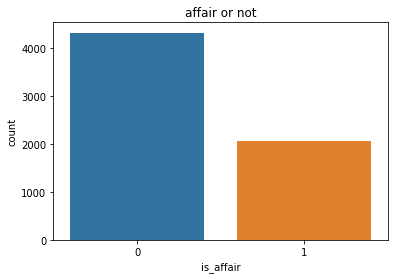

In [45]:
sns.countplot(x=extra_affair["is_affair"]).set(title = 'affair or not')

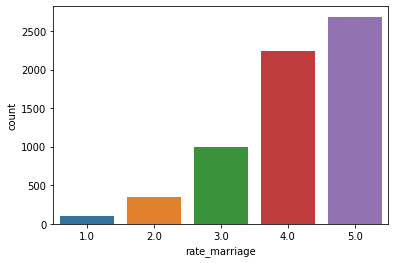

In [46]:
sns.countplot(x=extra_affair["rate_marriage"])

In [47]:
extra_affair['occupation_cat']= extra_affair['occupation'].astype('category')

In [48]:
extra_affair['occupation_husb_cat']= extra_affair['occupation_husb'].astype('category')
extra_affair['religious_cat']= extra_affair['religious'].astype('category')
extra_affair['educ_cat']= extra_affair['educ'].astype('category')

In [49]:
extra_affair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 14 columns):
rate_marriage          6366 non-null float64
age                    6366 non-null float64
yrs_married            6366 non-null float64
children               6366 non-null float64
religious              6366 non-null float64
educ                   6366 non-null float64
occupation             6366 non-null float64
occupation_husb        6366 non-null float64
affairs                6366 non-null float64
is_affair              6366 non-null int32
occupation_cat         6366 non-null category
occupation_husb_cat    6366 non-null category
religious_cat          6366 non-null category
educ_cat               6366 non-null category
dtypes: category(4), float64(9), int32(1)
memory usage: 498.3 KB


In [50]:
extra_affair.drop(['occupation','occupation_husb','educ','religious'],axis=1, inplace=True)

In [51]:
extra_affair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage          6366 non-null float64
age                    6366 non-null float64
yrs_married            6366 non-null float64
children               6366 non-null float64
affairs                6366 non-null float64
is_affair              6366 non-null int32
occupation_cat         6366 non-null category
occupation_husb_cat    6366 non-null category
religious_cat          6366 non-null category
educ_cat               6366 non-null category
dtypes: category(4), float64(5), int32(1)
memory usage: 299.3 KB


In [52]:
extra_affair.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'affairs',
       'is_affair', 'occupation_cat', 'occupation_husb_cat', 'religious_cat',
       'educ_cat'],
      dtype='object')

In [53]:
extra_affair= extra_affair[['rate_marriage', 'age', 'yrs_married', 'children', 'occupation_cat', 'occupation_husb_cat', 'religious_cat',
       'educ_cat','affairs','is_affair']]

[Text(0.5, 1.0, 'Number of Children')]

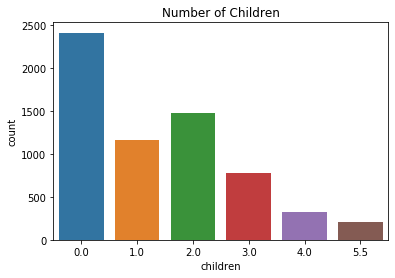

In [56]:
sns.countplot(x=extra_affair["children"]).set(title = 'Number of Children')

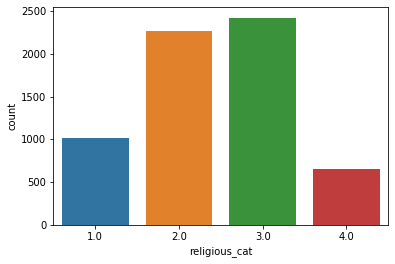

In [58]:
sns.countplot(x=extra_affair["religious_cat"])

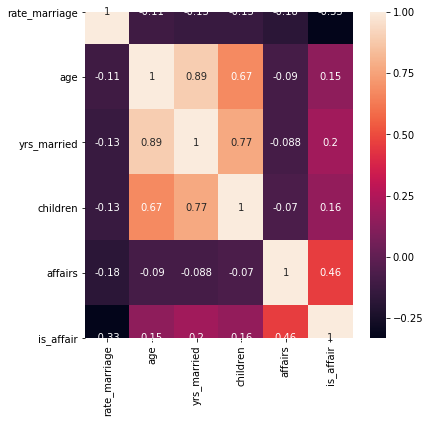

In [60]:
plt.figure(figsize=(6,6))
sns.heatmap(extra_affair.corr(),annot=True)

In [61]:
X= extra_affair.drop(['is_affair'],axis=1)
y= extra_affair['is_affair']

In [62]:
# Spliting dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(f'Shape of train feature:{X_train.shape}')
print(f'Shape of test feature :{X_test.shape}')
print(f'Shape of train target :{y_train.shape}')
print(f'Shape of test target  :{y_test.shape}')



Shape of train feature:(4456, 9)
Shape of test feature :(1910, 9)
Shape of train target :(4456,)
Shape of test target  :(1910,)


In [64]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score




# Instantiating Logistic regression model
model_lr =LogisticRegression()
# Fitting on train data
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred = model_lr.predict(X_test)

In [67]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0    1
Actual              
0          1275    0
1            41  594


In [68]:
accuracy_score(y_test,y_pred)

0.9785340314136126